# Dijkstra's Single Source Shortest Path Algorithm


Have you ever wondered the algorithm that generates the shortest route between two locations on Google Maps?
(or) How network packets are efficiently routed from between two network devicees in the same network?

These problems are solved by the class of algorithms called the Single Source Shortest Path Algorithms. The two scenarios mentioned above is solved with a variant of the **Dijkstra's Algorithm**, a greedy Single Source Shortest Path Algorithm. In the context of networking, there are varaints of the Dijkstra's Algorithm that are used in routing packets in the network which constitute the [Link State Routing(LSR)](https://en.wikipedia.org/wiki/Link-state_routing_protocol). [Intermediate System to Intermediate System (IS-IS)](https://en.wikipedia.org/wiki/IS-IS) and [Open Shortest Path First (OSPF)](https://en.wikipedia.org/wiki/Open_Shortest_Path_First) are examples of 



In this notebook, we aim to introduce the idea of implementing the Dijkstra's algorithm on a *undirected, weighted graph*. If the terms *undirected graphs* and *weighted graphs* are new to you, please check out the previous notebook [basic concepts of network graphs](./0_basic_concepts.ipynb). This notebook is organized as follows:

### Table of Contents
1. [Building the graph](#setup1)
2. [Implementing Dijkstra shortest path algorithm](#algorithm)
    1. [Pseudocode](#pseudocode)
3. [Computing the shortest path given source and target nodes](#shortestPath1)
4. [Running Dijkstra on a weighted, directed graph](#directedGraphs)
5. [Running Dijkstra on a negative-weighted, directed graph](#NegdirectedGraphs)
6. [Proof of Correctness](#proof)
7. [References](#references)

## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Dijkstra's shortest path algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

<a class="anchor" id="setup1"></a>
## Building the graph 

For this notebook, we consider a simple, weighted and undirected graph. By a simple graph, we mean that there exists only one edge between a pair of nodes.

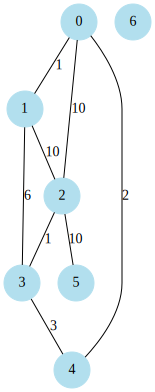

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()
g = Node()

graphs = Graph.createGraph([a, b, c, d, e, f, g], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)


visualizeGraph(graphs, "Dijkstra")

<a class="anchor" id="algorithm"></a>
## Implementing Dijkstra's shortest path algorithm

### About the algorithm
The idea behind Dijkstra's algorithm is to find the shortest path from a source Node to all the nodes (or) a specific target node on the graph without checking every source-to-destination combination, which in the worst case could be exponential in the number of vertices. Thus, considering every source-to-destination combination means that the computation of shortest path in large graphs becomes time consuming and cumbersome. Dijkstra's algorithm proposes a greedy approach, where at every iteration, the algorithm chooses a node with the current shortest distance and searches for paths extending from that node. We will make these statements clearer in coming sections.

<a class="anchor" id="pseudocode"></a>
### Pseudo Code
<pre> 
1  <b>function</b> Dijkstra(<i>Graph</i>, <i>source</i>):
2      
3      create all node set Q
4      create visited node set seen
5      <b>for each</b> node <i>v</i> in <i>Graph</i>:             
6          distance[<i>v</i>] ← INFINITY                  
7          previousNode[<i>v</i>] ← UNDEFINED                 
8          add <i>v</i> to <i>Q</i>    
9
10      distance[<i>source</i>] ← 0                        
11      
12      <b>while</b> <i>Q</i> is not empty:
13          <i>min_node</i> ← node in <i>Q</i> with min dist[min_node]   //node reached through smallest distance edge
14                                              
15          remove <i>min_node</i> from <i>Q</i> 
16          add min_node to seen 
17          <b>for each</b> neighbor <i>v</i> of <i>min_node</i> in <i>Q</i>: <i>// only v that are still in Q</i>
18              <i>computedDistance</i> ← distance[<i>min_node</i>] + length(<i>min_node</i>, <i>v</i>)
19              <b>if</b> <i>computedDistance</i> &lt; distance[<i>v</i>]:               
20                  distance[<i>v</i>] ← <i>computedDistance</i> 
21                  previousNode[<i>v</i>] ← <i>min_node</i> 
22
23      <b>return</b> distance[], previousNode[]
</pre>

In [3]:
def dijkstra(graph, sourceNode, targetNode):
    sourceNodeIndex = graph.get_nodeIndex(sourceNode)
    targetNodeIndex = graph.get_nodeIndex(targetNode)
    nodeList = graph.get_allNodes()

    # Make an array keeping track of distance from node to any node
    # in self.nodes. Initialize to infinity for all nodes but the 
    # starting node, keep track of "path" which relates to distance.
    # Index 0 = distance, index 1 = previous_hops
    dist = [None] * len(nodeList)
    previous = [None] * len(nodeList)
    for i in range(len(dist)):
        dist[i] = float("inf")
        previous[i] = [sourceNodeIndex]

    
    dist[sourceNodeIndex] = 0
 
    # Queue of all nodes in the graph
    # Note the integers in the queue correspond to indices of node
    # locations in the self.nodes array
    queue = [i for i in range(len(nodeList))]
    
    # Set of numbers seen so far
    seen = set()
    while len(queue) > 0:
        # Get node in queue that has not yet been seen
        # that has smallest distance to starting node
        min_dist = float("inf")
        min_node = None
        for n in queue: 
            if dist[n] < min_dist and n not in seen:
                min_dist = dist[n]
                min_node = n
        try:
            # Add min distance node to seen, remove from queue
            queue.remove(min_node)
            seen.add(min_node)


            # Get all next hops -> all shortest paths
            connections = graph.get_connections(min_node)

            # For each connection, update its path and total distance from 
            # starting node if the total distance is less than the current distance
            # in dist array
            print("current node is %s" % min_node, "\t and its neighbors are:" , [node for (node, weight) in connections.items()])
            print("nodes that are seen uptil now: ", list(seen))
            for (node, weight) in connections.items(): 

                tot_dist = weight + min_dist
                #print("From Node %s to Node %s there is an edge of weight %d" % (min_node, node, weight))
                #print('Previous distance value: %.0f \t Computed distance value: %d' % (dist[node], tot_dist))

                if tot_dist < dist[node]:
                    #if less, print the update
                    print("For node %d : Initial Distance was %.0f has been updated to %d " % (node, dist[node], tot_dist))
                    dist[node] = tot_dist
                    previous[node] = list(previous[min_node])
                    previous[node].append(node)
                    
                    if node == targetNodeIndex :
                        seen.add(node)
                        print("\n****************************************************************************************")
                        print("Total distance to sourceNode %d from targetNode %d is %d" % (sourceNodeIndex, targetNodeIndex, dist[node]))
                        print("Nodes part of the shortest path: ", previous[node])
                        return dist[node], previous[node]
        except ValueError:
                return ("No path exists to node %d since there is %s" %(targetNodeIndex, "no edge connected to the graph")), None
                
        print("---------------------------------------------------------------------------------------\n")
    

<a class="anchor" id="shortestPath1"></a>
## Computing the shortest path given source and target nodes

Now, that we have an understanding of how DIjkstra's algorithm computes the shortest path, we find the shortest path between a given source node and the target node. In short, we visualize only the shortest path between the source and the target nodes instead of visualizing the shortest paths to all the nodes. 

In [4]:
sourceNode = a
targetNode = g

distances, previousNodes = dijkstra(graphs, sourceNode, targetNode)
edgelist = []
path = None
if previousNodes != None:
    for i in range(len(previousNodes)):
            try:
                wt = graphs.get_edgeWeight(previousNodes[i],previousNodes[i+1])
                edgelist.append((previousNodes[i],previousNodes[i+1], wt))

            except IndexError:
                break

    path = displayPath(edgelist, "Dijkstra")
else:
    print(distances)

path

current node is 0 	 and its neighbors are: [1, 2, 4]
nodes that are seen uptil now:  [0]
For node 1 : Initial Distance was inf has been updated to 1 
For node 2 : Initial Distance was inf has been updated to 10 
For node 4 : Initial Distance was inf has been updated to 2 
---------------------------------------------------------------------------------------

current node is 1 	 and its neighbors are: [0, 2, 3]
nodes that are seen uptil now:  [0, 1]
For node 3 : Initial Distance was inf has been updated to 7 
---------------------------------------------------------------------------------------

current node is 4 	 and its neighbors are: [0, 3]
nodes that are seen uptil now:  [0, 1, 4]
For node 3 : Initial Distance was 7 has been updated to 5 
---------------------------------------------------------------------------------------

current node is 3 	 and its neighbors are: [1, 2, 4]
nodes that are seen uptil now:  [0, 1, 3, 4]
For node 2 : Initial Distance was 10 has been updated to 6

<a class="anchor" id="directedGraphs"></a>
## Running Dijkstra on a weighted, directed graph

To establish that the Dijkstra's algorithm could be run on directed graphs, let us consider the following example

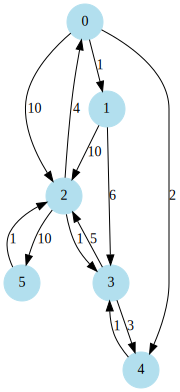

In [5]:
directed_graphs = Graph.createGraph([a, b, c, d, e, f], directed=True)


directed_graphs.add_Edge(a,b,1)
directed_graphs.add_Edge(a,c,10)
directed_graphs.add_Edge(c,a,4)
directed_graphs.add_Edge(a,e,2)
directed_graphs.add_Edge(b,c,10)
directed_graphs.add_Edge(b,d,6)
directed_graphs.add_Edge(d,c,5)
directed_graphs.add_Edge(c,d,1)
directed_graphs.add_Edge(f,c,1)
directed_graphs.add_Edge(c,f,10)
directed_graphs.add_Edge(d,e,3)
directed_graphs.add_Edge(e,d,1)

visualizeGraph(directed_graphs, "directedDijkstra")

current node is 0 	 and its neighbors are: [1, 2, 4]
nodes that are seen uptil now:  [0]
For node 1 : Initial Distance was inf has been updated to 1 
For node 2 : Initial Distance was inf has been updated to 10 
For node 4 : Initial Distance was inf has been updated to 2 
---------------------------------------------------------------------------------------

current node is 1 	 and its neighbors are: [0, 2, 3]
nodes that are seen uptil now:  [0, 1]
For node 3 : Initial Distance was inf has been updated to 7 
---------------------------------------------------------------------------------------

current node is 4 	 and its neighbors are: [0, 3]
nodes that are seen uptil now:  [0, 1, 4]
For node 3 : Initial Distance was 7 has been updated to 3 
---------------------------------------------------------------------------------------

current node is 3 	 and its neighbors are: [1, 2, 4]
nodes that are seen uptil now:  [0, 1, 3, 4]
For node 2 : Initial Distance was 10 has been updated to 8

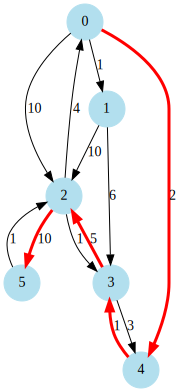

In [6]:
sourceNode = a
targetNode = f

dir_distances, dir_previousNodes = dijkstra(directed_graphs, sourceNode, targetNode)

dir_edgelist = []
if dir_previousNodes == None:
    print(dir_distances)
else:
    for i in range(len(dir_previousNodes)):
                try:
                    wt = directed_graphs.get_edgeWeight(dir_previousNodes[i],dir_previousNodes[i+1])
                    dir_edgelist.append((dir_previousNodes[i],dir_previousNodes[i+1], wt))

                except IndexError:
                    break

displayPath(dir_edgelist, "directedDijkstra")

## Running Dijkstra's on Negative-weighted graphs

When running Dijkstra on negative weighted graph, we are not always guaranteed a shortest path from the source node. This is due to two steps in the design of the algorithm:

1. Once  a node is added to `seen` it is not visited again which means that if we are able to find a shortest path on a negative weighted graph - it does not update the distance for the visited node.
2. Since the algorithm applies the greedy criterion of picking the edge with the smallest weight from the current node; there is a possibility that a shorter path to a node from the source is not discovered, which means that there is no guarantee that the computed path is the shortest paht.

Bellman-Ford algorithm, which we shall introduce in the [next notebook](./2_bellman_ford.ipynb), can work better than the Dijkstra's algorithm on graphs with negative weights.

<a class="anchor" id="proof"></a>
## Proof of Correctness

We will now formally prove the correctness of Dijkstra's algorithm. 

Let us first setup some required notation. Consider Dijkstra's algorithm run on a directed, weighted graph represented as $G(V,E)$ where $V$ is the set of nodes of $G$ and E is the set of edges of $G$ which contain non-negative edges. Let $s$ denote the source node. For any node $u \in V$, let $\delta(u)$ denote the shortest path distance between node $s$ to node $u$. Let $d[u]$ denote the distance computed by Dijkstra's algorithm from source node $s$ to node $u$.

To prove the correctness of Dijkstra's algorithm, we need to establish that $$d[u] = \delta(u) \quad  \forall u \in V.$$ We will show that the above equality is true at the moment when node $u$ is added to the set of visited nodes $S$. At any iteration, let $Q$ denote the set of not visited nodes, such that $V = S \cup Q$. Once we establish the above equality at the moment of addition of node $u$ to $S$, we make use of the fact that the distance is not updated thereafter for node $u$ to establish the correctess at further time instances.

*Initialization:* We set $d[s] = 0$ and set all other distances as infinity, i.e., $d[u] = \infty \quad \forall u \in V, u \neq s$.

*Induction hypothesis or assumption*: For all nodes $x$ in visited set $S$, $d[x] = \delta(x).$

After the first iteration, $S = \{s\}$ and $d[s] = \delta(s) = 0$, thus satisfying the induction hypothesis.

*Induction step:* We show that for a new node $u$ added to visited set $S$, $d[u] = \delta(u).$ We will prove this claim via contradiction. 

**Claim 1:** For all nodes $v$ not in set of visited nodes, $d[v] \ge \delta(v).$

*Proof:* If $d[v] = \infty,$ the claim is trivially true. If $d[v] < \infty,$ there exists $x \in S$ such that 
\begin{align}
d[v] &= d[x] + len(x,v)\\
&=\delta(x)+len(x,v)\\
&\ge \delta(v),
\end{align}
where the second equality follows from our inductive hypothesis on the set of visited nodes $S$, and the third inequality follows from the fact that this is the distance for one feasible path and does not necessarily be the optimal path to $v$.

Let $u$ be the first node for which $d[u] \neq \delta(u)$ when it is added to the set of visited nodes $S$. Combined with the above claim, this implies that $d[u] > \delta(u)$. Let $P$ denote the optimal path from source $s$ to $u$ with distance $\delta(u)$. Let the path $P$ be represented as $P = s-x^*-y-u$, where $x^*$ is the last element of $P$ in $S$, and let $y \in Q$ be the first element just after $x^*$. The following inequalities should hold:
\begin{align}
\delta(u) &= \delta(x^*)+len(x^*,y)+length(y,u)\\
&\ge d[y] + length(y,u)\\
&\ge d[y]\\
&\ge d[u],
\end{align}

which contradicts the initial claim. The first inequality holds from the definition of $d[y]$, the second inequality follows as $length(y,x) \ge 0$, and the third inequality follows from the fact that since $u$ was chosen over $y$ to be added to $S$, $d[u] \le d[y]$. 

Hence, $d[u] = \delta(u)$.

<a class="anchor" id="references"></a>
## Reference

- [1] Leiserson, Charles Eric, Ronald L. Rivest, Thomas H. Cormen, and Clifford Stein. Introduction to algorithms. Chapter 24. Vol. 6. Cambridge, MA: MIT press, 2001.
- [2] Dijkstra's Algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [3] Micha Shute, Dijkstra's Shortest Path Algorithm in Python on [Medium](https://medium.com/cantors-paradise/dijkstras-shortest-path-algorithm-in-python-d955744c7064)